<a href="https://www.kaggle.com/code/sanjushusanth/eda-feature-engineering-model-building?scriptVersionId=156683202" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
!pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/eb/43/ec8d59a663e0a1a67196b404ec38ccb0051708bad74a48c80d96c61dd0e5/pycaret-3.2.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 46.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 62.8 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for plotly-resampler>=0.8.3.1 from https://files.pythonhosted.org/packages/08/1d/87d4ed45c26226630bcb0a205ff006c00645cc68977e22c0f6f16a7f5d2b/plotly_resampler-0.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for pmdarima!=1.8.1,<3.0.0,>=1.8.0 from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
     ━━━━━━━━━━

In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')

In [4]:
sample_submission

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128
3,7908,0.628084,0.034788,0.337128
4,7909,0.628084,0.034788,0.337128
...,...,...,...,...
5266,13171,0.628084,0.034788,0.337128
5267,13172,0.628084,0.034788,0.337128
5268,13173,0.628084,0.034788,0.337128
5269,13174,0.628084,0.034788,0.337128


### Process that we need to follow

1.  Cleaning
2.  Feature Engineering
3.  Feature Transformation
4.  Encoding
5.  Scalling
6.  Target Transformation
7.  Model Selection
8.  Hyperparameter optimization
9.  Ensembling
10. Feature Selection

### ****Data Cleaning & Feature Engineering****

In [5]:
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [6]:
df_train.shape

(7905, 20)

In [7]:
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [8]:
df_test.shape

(5271, 19)

In [9]:
target = df_train['Status']
test_id = df_test['id']

train1 = df_train.drop(['id','Status'], axis=1)
test1 = df_test.drop('id', axis=1)

data1 = pd.concat([train1, test1], axis=0).reset_index(drop=True)
data1

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [10]:
target

0       D
1       C
2       D
3       C
4       C
       ..
7900    C
7901    C
7902    D
7903    D
7904    C
Name: Status, Length: 7905, dtype: object

In [11]:
data1.shape

(13176, 18)

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         13176 non-null  int64  
 1   Drug           13176 non-null  object 
 2   Age            13176 non-null  int64  
 3   Sex            13176 non-null  object 
 4   Ascites        13176 non-null  object 
 5   Hepatomegaly   13176 non-null  object 
 6   Spiders        13176 non-null  object 
 7   Edema          13176 non-null  object 
 8   Bilirubin      13176 non-null  float64
 9   Cholesterol    13176 non-null  float64
 10  Albumin        13176 non-null  float64
 11  Copper         13176 non-null  float64
 12  Alk_Phos       13176 non-null  float64
 13  SGOT           13176 non-null  float64
 14  Tryglicerides  13176 non-null  float64
 15  Platelets      13176 non-null  float64
 16  Prothrombin    13176 non-null  float64
 17  Stage          13176 non-null  float64
dtypes: flo

##### Comments: There is no missing values present in the dataset

In [13]:
target.shape

(7905,)

In [14]:
target.unique()

array(['D', 'C', 'CL'], dtype=object)

### Feature Transformation

#### Distribution of data

In [15]:
num_cols = data1.select_dtypes(exclude='O').columns
num_cols

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

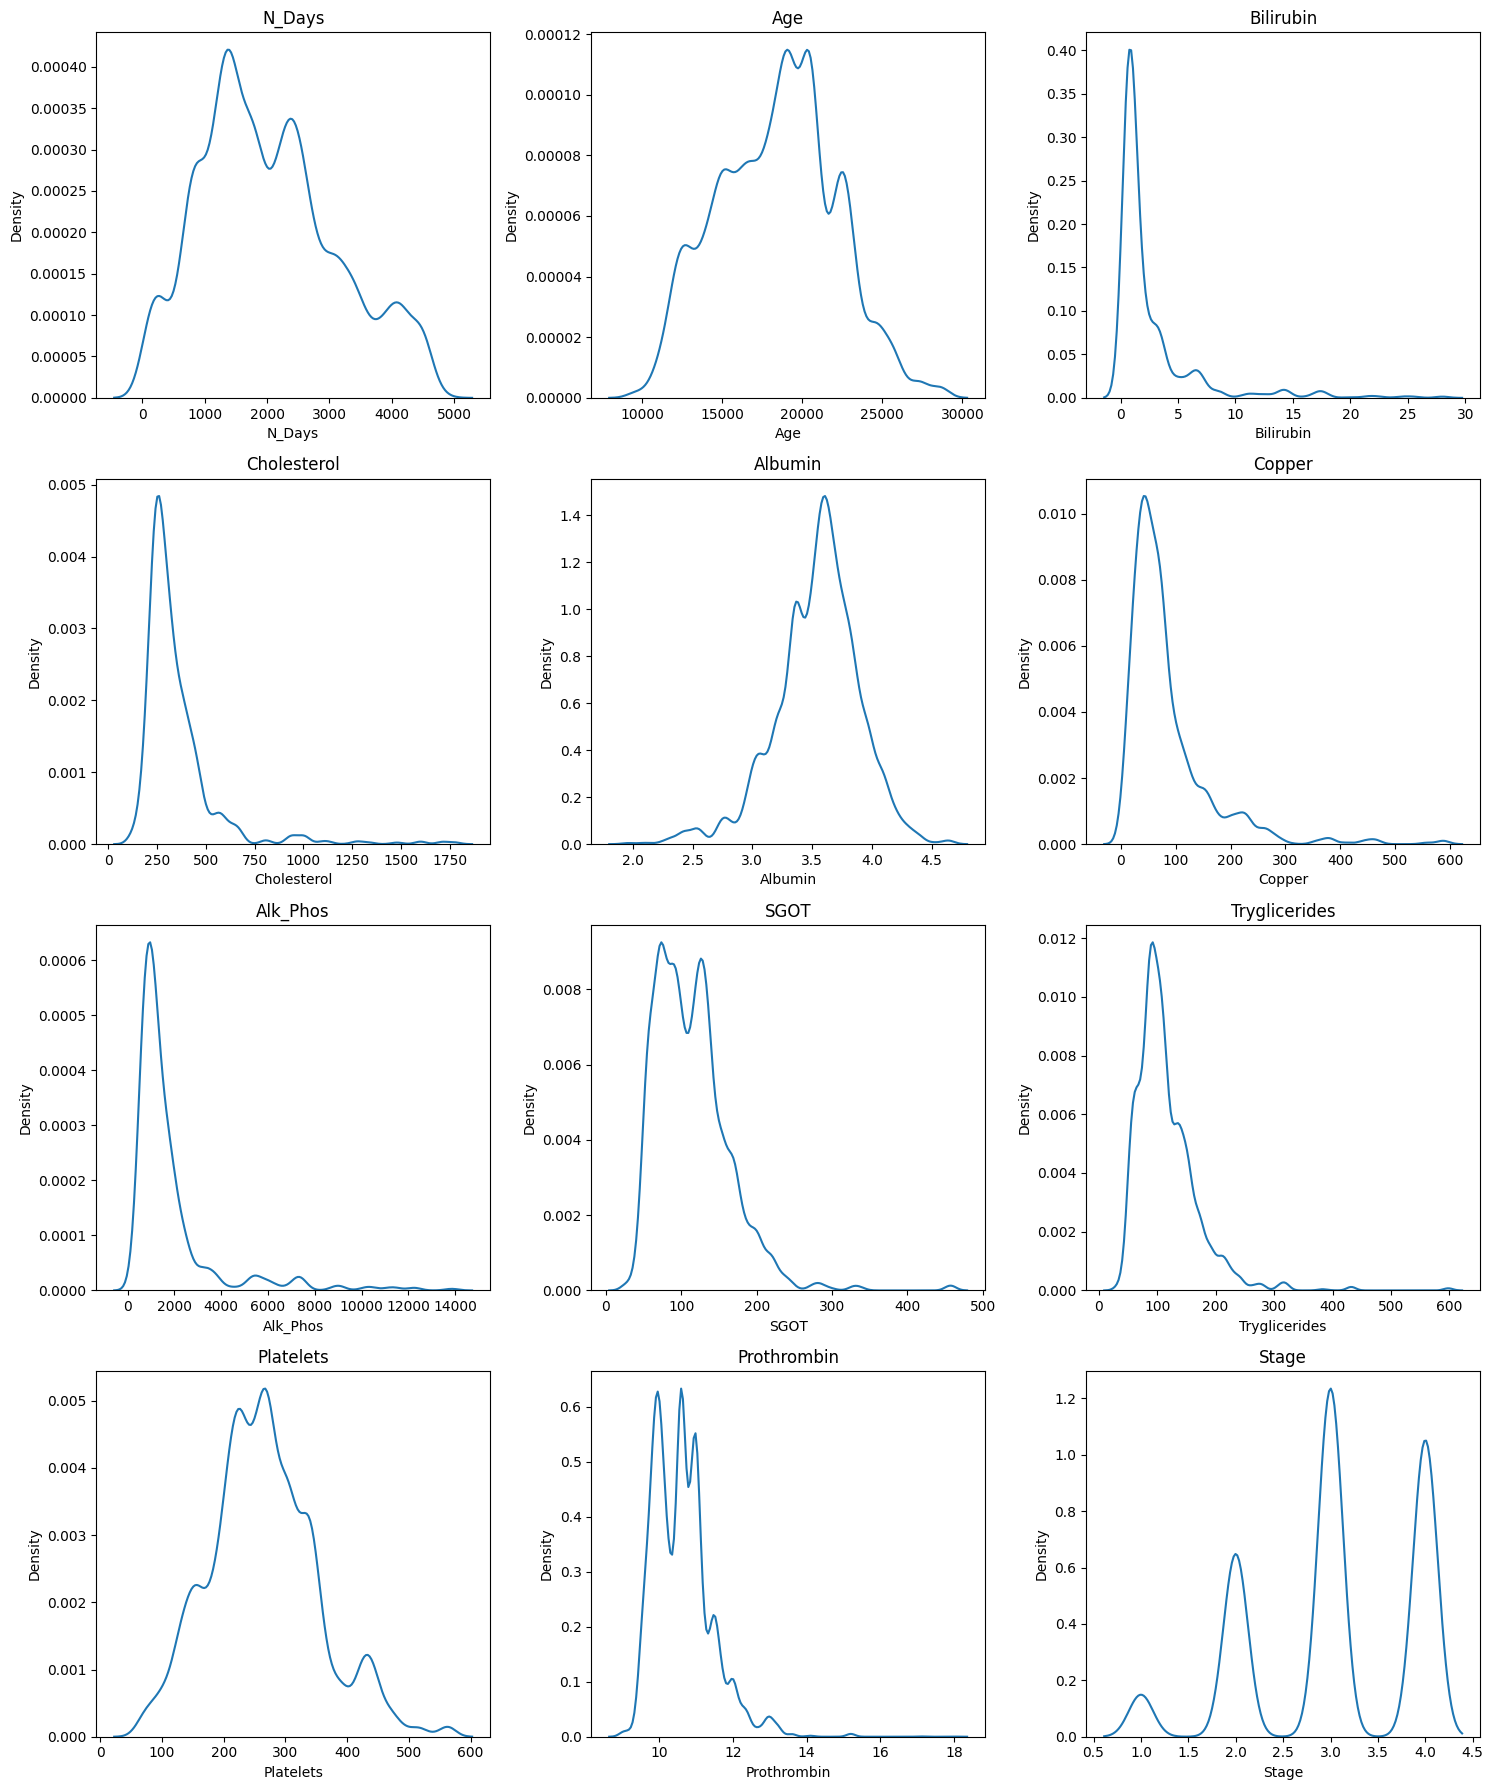

In [16]:
num_row = 4
num_cols = 3
fig, axes = plt.subplots(num_row, num_cols, figsize=(15, 18))

for index, feature in enumerate(data1.select_dtypes(exclude='O').columns):
    ax = axes[index // num_cols, index % num_cols]  # Calculate subplot index correctly
    sns.kdeplot(data1[feature], ax=ax)
    ax.set_title(feature)  # Set title for each subplot

plt.tight_layout()
plt.show()

#### Comments: Most of the features are skewed little bit, they require the feature transformation

In [17]:
import scipy 

In [18]:
num_columns = data1.select_dtypes(exclude='O').columns
num_columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [19]:
skewed_df = pd.DataFrame(num_columns,columns=['Feature'])
skewed_df['Skew'] = scipy.stats.skew(data1[num_columns])
skewed_df['Absolute'] = skewed_df['Skew'].apply(abs)
skewed_df['Skewed'] = skewed_df['Absolute'].apply(lambda x: True if x > 0.5 else False)
skewed_df

,Feature,Skew,Absolute,Skewed
0,N_Days,0.441024,0.441024,False
1,Age,0.043244,0.043244,False
2,Bilirubin,3.373655,3.373655,True
3,Cholesterol,3.675326,3.675326,True
4,Albumin,-0.569451,0.569451,True
5,Copper,2.768250,2.768250,True
6,Alk_Phos,3.204595,3.204595,True
7,SGOT,1.588936,1.588936,True
8,Tryglicerides,2.557610,2.557610,True
9,Platelets,0.422047,0.422047,False


In [20]:
data1[skewed_df.query('Skewed == True')['Feature'].values].describe()

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Prothrombin,Stage
count,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000
mean,2.596847,351.331815,3.544221,84.222416,1814.540225,114.197725,115.318534,10.630823,3.034305
std,3.828640,197.413677,0.349706,76.558760,1916.383653,48.861248,52.557379,0.786116,0.862303
min,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,9.000000,1.000000
25%,0.700000,248.000000,3.350000,39.000000,824.000000,75.950000,84.000000,10.000000,2.000000
50%,1.100000,299.000000,3.580000,63.000000,1166.000000,106.950000,104.000000,10.600000,3.000000
75%,3.000000,390.000000,3.770000,102.000000,1840.000000,137.950000,139.000000,11.000000,4.000000
max,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,18.000000,4.000000


### Comments: 
We can notice that the minimum value is not zero, so we can use the Log tranformation else if there is zero value present in the minimum then we need to use log(x+1) it will be a positive value

In [21]:
skewed_features = data1[skewed_df.query('Skewed == True')['Feature'].values].columns
skewed_features

Index(['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Prothrombin', 'Stage'],
      dtype='object')

In [22]:
def transform(df):

    for feature in skewed_features:
        df[feature] = np.log(df[feature])
    return df
data1 = transform(data1)    

In [23]:
skew_df= pd.DataFrame(num_columns,columns=['Feature'])
skew_df['Skew'] = scipy.stats.skew(data1[num_columns])
skew_df['Absolute'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Feature,Skew,Absolute,Skewed
0,N_Days,0.441024,0.441024,False
1,Age,0.043244,0.043244,False
2,Bilirubin,0.916639,0.916639,True
3,Cholesterol,1.289928,1.289928,True
4,Albumin,-1.072453,1.072453,True
5,Copper,-0.000649,0.000649,False
6,Alk_Phos,1.023774,1.023774,True
7,SGOT,0.009712,0.009712,False
8,Tryglicerides,0.345576,0.345576,False
9,Platelets,0.422047,0.422047,False


In [24]:
data2 = data1.copy()

### Encoding

### Categories:

C - (censored) indicates the patient was alive at N_Days

Cl - indicates the patient was alive at N_Days due to liver a transplant, 

D - indicates the patient was deceased at N_Days.

Based on the descriptions "status" is a categorical variable representing the survival status of patients at a certain time point (N_Days). In this case, the variable "status" falls under the nominal category because it involves distinct, non-numeric categories or labels without inherent order or ranking.

In [25]:
data2.select_dtypes(include='O').describe().T

,count,unique,top,freq
Drug,13176,2,Placebo,6704
Sex,13176,2,F,12213
Ascites,13176,2,N,12552
Hepatomegaly,13176,2,Y,6772
Spiders,13176,2,N,9938
Edema,13176,3,N,11947


In [26]:
def onhot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column, dtype=int, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [27]:
def cleaning(df):
    df = df.copy()
    
    # Binary Encoding
    df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})
    df['Sex'] = df['Sex'].replace({'M':0, 'F':1})
    df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})
    df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})
    df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})
    
    # One hot encoding
    df = onhot_encode(df,'Edema')
    
    return df

In [28]:
X = cleaning(data2)

In [29]:
data3 = X.copy()

In [31]:
data3.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_S,Edema_Y
0,999,0,21532,0,0,0,0,0.832909,5.755742,1.208960,5.147494,7.378384,5.191845,4.143135,394.0,2.272126,1.098612,0,0
1,2574,1,19237,1,0,0,0,-0.105361,5.897154,1.264127,4.143135,7.272398,4.904163,4.477337,361.0,2.397895,1.098612,0,0
2,3428,1,13727,1,0,1,1,1.193922,5.700444,1.266948,4.875197,6.936343,4.782060,3.912023,199.0,2.459589,1.386294,0,1
3,2576,1,18460,1,0,0,0,-0.510826,5.545177,1.252763,4.060443,7.410347,4.266896,4.564348,269.0,2.370244,1.098612,0,0
4,788,1,16658,1,0,1,0,0.095310,5.846439,1.294727,4.143135,7.074117,4.832704,4.564348,298.0,2.360854,1.386294,0,0


#### Target Encoding

In [32]:
map_target = {"D":2, "C":0, "CL":1}

target1 = target.map(map_target)

In [33]:
target1 

0       2
1       0
2       2
3       0
4       0
       ..
7900    0
7901    0
7902    2
7903    2
7904    0
Name: Status, Length: 7905, dtype: int64

### Scalling

In [34]:
scaler = StandardScaler()
scaler.fit(data3)
data3 = pd.DataFrame(scaler.transform(data3), index=data3.index, columns=data3.columns)

In [35]:
data3

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_S,Edema_Y
0,-0.948107,-1.017766,0.853636,-3.561214,-0.222965,-1.028331,-0.570807,0.471903,-0.033019,-0.494515,1.309614,0.247998,1.316241,-1.320262,1.477038,-1.245800,0.116224,-0.229819,-0.212252
1,0.495246,0.982545,0.223500,0.280803,-0.222965,-1.028331,-0.570807,-0.502841,0.327492,0.038445,0.017005,0.093450,0.611454,-0.475255,1.099932,0.514223,0.116224,-0.229819,-0.212252
2,1.277865,0.982545,-1.289375,0.280803,-0.222965,0.972450,1.751907,0.846951,-0.173996,0.065697,0.959168,-0.396587,0.312317,-1.904611,-0.751320,1.377566,0.948357,-0.229819,4.711389
3,0.497079,0.982545,0.010160,0.280803,-0.222965,-1.028331,-0.570807,-0.924069,-0.569827,-0.071340,-0.089419,0.294607,-0.949773,-0.255253,0.048603,0.127266,0.116224,-0.229819,-0.212252
4,-1.141471,0.982545,-0.484613,0.280803,-0.222965,0.972450,-0.570807,-0.294370,0.198200,0.334074,0.017005,-0.195684,0.436388,-0.255253,0.380000,-0.004134,0.948357,-0.229819,-0.212252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,0.766505,0.982545,-1.686951,0.280803,-0.222965,-1.028331,-0.570807,-0.120821,-0.148545,-0.266517,0.241398,-0.006071,0.789244,-2.227829,-0.957015,-0.004134,0.116224,-0.229819,-0.212252
13172,-0.241551,0.982545,1.751752,0.280803,-0.222965,-1.028331,-0.570807,-1.113478,-0.967799,1.433662,0.856972,-1.037565,-0.696984,-0.308485,0.528557,-1.245800,0.116224,-0.229819,-0.212252
13173,1.533545,-1.017766,-0.393456,0.280803,-0.222965,0.972450,-0.570807,-0.625203,-0.041100,1.433662,-2.014116,0.280424,1.186129,-1.053865,1.842718,0.386423,0.116224,-0.229819,-0.212252
13174,-0.749245,0.982545,-1.825883,0.280803,-0.222965,-1.028331,-0.570807,-0.763926,0.069760,0.723158,-0.229958,-1.004942,-1.498167,0.432312,0.471420,-0.542433,-3.061560,-0.229819,-0.212252


In [36]:
data4 = data3.copy()

## Model Selection

In [38]:
from pycaret.classification import *

In [39]:
train_final = data4.loc[:train1.index.max(), :].copy()
test_final = data4.loc[train1.index.max() + 1:, :].reset_index(drop=True).copy()

In [40]:
train_final


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_S,Edema_Y
0,-0.948107,-1.017766,0.853636,-3.561214,-0.222965,-1.028331,-0.570807,0.471903,-0.033019,-0.494515,1.309614,0.247998,1.316241,-1.320262,1.477038,-1.245800,0.116224,-0.229819,-0.212252
1,0.495246,0.982545,0.223500,0.280803,-0.222965,-1.028331,-0.570807,-0.502841,0.327492,0.038445,0.017005,0.093450,0.611454,-0.475255,1.099932,0.514223,0.116224,-0.229819,-0.212252
2,1.277865,0.982545,-1.289375,0.280803,-0.222965,0.972450,1.751907,0.846951,-0.173996,0.065697,0.959168,-0.396587,0.312317,-1.904611,-0.751320,1.377566,0.948357,-0.229819,4.711389
3,0.497079,0.982545,0.010160,0.280803,-0.222965,-1.028331,-0.570807,-0.924069,-0.569827,-0.071340,-0.089419,0.294607,-0.949773,-0.255253,0.048603,0.127266,0.116224,-0.229819,-0.212252
4,-1.141471,0.982545,-0.484613,0.280803,-0.222965,0.972450,-0.570807,-0.294370,0.198200,0.334074,0.017005,-0.195684,0.436388,-0.255253,0.380000,-0.004134,0.948357,-0.229819,-0.212252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,-0.795066,-1.017766,-0.434916,0.280803,-0.222965,-1.028331,-0.570807,-0.625203,-0.090128,0.092873,-0.633635,0.273280,-0.696984,1.887079,0.905664,-0.960197,-1.056602,-0.229819,-0.212252
7901,-0.496315,0.982545,-0.382199,0.280803,-0.222965,0.972450,-0.570807,-0.502841,-0.530301,-0.266517,-0.003587,0.093450,0.738025,-0.780255,0.140023,-0.819552,0.948357,-0.229819,-0.212252
7902,-0.419336,-1.017766,2.045540,0.280803,-0.222965,-1.028331,1.751907,0.326708,-0.898893,-0.967316,-0.254949,-0.539399,-1.003619,-1.360717,-0.739893,2.525262,-1.056602,4.351257,-0.212252
7903,1.420825,-1.017766,1.245721,-3.561214,-0.222965,0.972450,-0.570807,-0.763926,-0.650767,-2.401195,-0.854806,-0.433905,-1.483170,0.266454,-0.499916,-0.004134,0.948357,-0.229819,-0.212252


In [41]:
test_final

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_S,Edema_Y
0,1.654511,-1.017766,0.357215,0.280803,-0.222965,0.972450,-0.570807,-0.203976,1.361174,-0.437009,0.057227,0.279533,0.903136,-0.418434,1.888428,-0.004134,-1.056602,-0.229819,-0.212252
1,0.398106,-1.017766,-0.946713,0.280803,-0.222965,-1.028331,-0.570807,-0.294370,1.844588,1.735955,0.532010,-0.104741,0.903136,0.956059,-0.431351,-0.819552,-1.056602,-0.229819,-0.212252
2,-1.816869,0.982545,-1.448076,0.280803,-0.222965,0.972450,-0.570807,0.326708,-1.915635,-1.690261,-0.387747,-0.496282,-1.003619,-0.126879,-0.591336,2.851986,0.948357,-0.229819,4.711389
3,0.271641,-1.017766,0.573027,0.280803,-0.222965,-1.028331,-0.570807,-0.924069,-0.225674,0.849447,-0.567620,-1.299473,0.436388,-1.618068,0.060031,-0.004134,-1.056602,-0.229819,-0.212252
4,-0.383596,-1.017766,0.955776,0.280803,-0.222965,0.972450,-0.570807,-0.043833,-0.368835,-1.657678,0.856972,-0.286095,0.425633,0.432312,-0.499916,-1.102270,-3.061560,-0.229819,-0.212252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.766505,0.982545,-1.686951,0.280803,-0.222965,-1.028331,-0.570807,-0.120821,-0.148545,-0.266517,0.241398,-0.006071,0.789244,-2.227829,-0.957015,-0.004134,0.116224,-0.229819,-0.212252
5267,-0.241551,0.982545,1.751752,0.280803,-0.222965,-1.028331,-0.570807,-1.113478,-0.967799,1.433662,0.856972,-1.037565,-0.696984,-0.308485,0.528557,-1.245800,0.116224,-0.229819,-0.212252
5268,1.533545,-1.017766,-0.393456,0.280803,-0.222965,0.972450,-0.570807,-0.625203,-0.041100,1.433662,-2.014116,0.280424,1.186129,-1.053865,1.842718,0.386423,0.116224,-0.229819,-0.212252
5269,-0.749245,0.982545,-1.825883,0.280803,-0.222965,-1.028331,-0.570807,-0.763926,0.069760,0.723158,-0.229958,-1.004942,-1.498167,0.432312,0.471420,-0.542433,-3.061560,-0.229819,-0.212252


In [42]:
target1

0       2
1       0
2       2
3       0
4       0
       ..
7900    0
7901    0
7902    2
7903    2
7904    0
Name: Status, Length: 7905, dtype: int64

In [47]:
model_data = pd.concat([train_final, target1], axis=1)

In [48]:
_ =setup(data=model_data, target='Status')

,Description,Value
0,Session id,6670
1,Target,Status
2,Target type,Multiclass
3,Original data shape,"(7905, 20)"
4,Transformed data shape,"(7905, 20)"
5,Transformed train set shape,"(5533, 20)"
6,Transformed test set shape,"(2372, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [49]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8256,0.9023,0.8256,0.8141,0.8144,0.6258,0.6303,1.5930
lightgbm,Light Gradient Boosting Machine,0.8254,0.9000,0.8254,0.8198,0.8157,0.6273,0.6308,1.0430
catboost,CatBoost Classifier,0.8236,0.8988,0.8236,0.8178,0.8130,0.6238,0.6268,8.0260
rf,Random Forest Classifier,0.8220,0.8965,0.8220,0.8185,0.8087,0.6164,0.6213,0.5050
xgboost,Extreme Gradient Boosting,0.8216,0.8952,0.8216,0.8159,0.8127,0.6204,0.6234,0.4480
et,Extra Trees Classifier,0.8189,0.8908,0.8189,0.8120,0.8052,0.6093,0.6147,0.3640
ada,Ada Boost Classifier,0.8075,0.8161,0.8075,0.7947,0.7980,0.5904,0.5936,0.1820
lr,Logistic Regression,0.8003,0.8749,0.8003,0.7733,0.7834,0.5674,0.5727,0.5380
lda,Linear Discriminant Analysis,0.7969,0.8747,0.7969,0.7665,0.7793,0.5583,0.5645,0.0300
ridge,Ridge Classifier,0.7967,0.0000,0.7967,0.7662,0.7787,0.5564,0.5635,0.0210


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=6670, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

### Baseline Model

In [50]:
baseline_model = GradientBoostingClassifier()

In [51]:
baseline_model.fit(train_final, target1)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Bagging Ensemble

In [56]:
models = {
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'LGBMClassifier'             : LGBMClassifier(),
    'CatBoostClassifier'         : CatBoostClassifier(),
    'RandomForestClassifier'     : RandomForestClassifier(),
    'XGBClassifier'              : XGBClassifier()
}

In [57]:
for name, model in models.items():
    model.fit(train_final, target1)
    print(name + 'Trained')

GradientBoostingClassifierTrained
LGBMClassifierTrained
Learning rate set to 0.087926
0:	learn: 1.0111111	total: 66.7ms	remaining: 1m 6s
1:	learn: 0.9389290	total: 79.1ms	remaining: 39.5s
2:	learn: 0.8811144	total: 89.6ms	remaining: 29.8s
3:	learn: 0.8324082	total: 99.4ms	remaining: 24.7s
4:	learn: 0.7897356	total: 122ms	remaining: 24.3s
5:	learn: 0.7553335	total: 131ms	remaining: 21.7s
6:	learn: 0.7242064	total: 140ms	remaining: 19.8s
7:	learn: 0.6965205	total: 148ms	remaining: 18.4s
8:	learn: 0.6726000	total: 157ms	remaining: 17.3s
9:	learn: 0.6512281	total: 166ms	remaining: 16.4s
10:	learn: 0.6321017	total: 179ms	remaining: 16.1s
11:	learn: 0.6152778	total: 188ms	remaining: 15.5s
12:	learn: 0.6007430	total: 197ms	remaining: 15s
13:	learn: 0.5879525	total: 206ms	remaining: 14.5s
14:	learn: 0.5752465	total: 215ms	remaining: 14.1s
15:	learn: 0.5647992	total: 223ms	remaining: 13.7s
16:	learn: 0.5557000	total: 232ms	remaining: 13.4s
17:	learn: 0.5471116	total: 240ms	remaining: 13.1s
18:	

#### Evaluate

In [60]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = cross_val_score(model, train_final, target1, scoring='neg_log_loss', cv=kf)
    results[name] = result 

Learning rate set to 0.087454
0:	learn: 1.0115972	total: 8.16ms	remaining: 8.15s
1:	learn: 0.9400691	total: 15.7ms	remaining: 7.83s
2:	learn: 0.8835618	total: 22.9ms	remaining: 7.61s
3:	learn: 0.8333996	total: 29.9ms	remaining: 7.43s
4:	learn: 0.7917328	total: 36.7ms	remaining: 7.31s
5:	learn: 0.7573176	total: 43.5ms	remaining: 7.21s
6:	learn: 0.7264383	total: 50.3ms	remaining: 7.13s
7:	learn: 0.6996124	total: 57.7ms	remaining: 7.16s
8:	learn: 0.6750291	total: 65.8ms	remaining: 7.24s
9:	learn: 0.6529913	total: 72.8ms	remaining: 7.21s
10:	learn: 0.6350257	total: 80.1ms	remaining: 7.21s
11:	learn: 0.6179523	total: 87.9ms	remaining: 7.24s
12:	learn: 0.6036537	total: 95ms	remaining: 7.21s
13:	learn: 0.5912513	total: 102ms	remaining: 7.21s
14:	learn: 0.5788805	total: 109ms	remaining: 7.18s
15:	learn: 0.5682684	total: 116ms	remaining: 7.16s
16:	learn: 0.5584438	total: 124ms	remaining: 7.18s
17:	learn: 0.5503013	total: 131ms	remaining: 7.17s
18:	learn: 0.5422429	total: 139ms	remaining: 7.17s


In [63]:
for name, model in results.items():
    print('---------------\n'+ name +'\n---------------')
    print(np.mean(result))
    print(np.std(result))

---------------
GradientBoostingClassifier
---------------
-0.5037133266285232
0.038352379113558016
---------------
LGBMClassifier
---------------
-0.5037133266285232
0.038352379113558016
---------------
CatBoostClassifier
---------------
-0.5037133266285232
0.038352379113558016
---------------
RandomForestClassifier
---------------
-0.5037133266285232
0.038352379113558016
---------------
XGBClassifier
---------------
-0.5037133266285232
0.038352379113558016


### Combine Models

In [67]:
final_predictions = (
    0.2 * (models['GradientBoostingClassifier'].predict_proba(test_final))+
    0.2 * (models['LGBMClassifier'].predict_proba(test_final))+
    0.2 * (models['CatBoostClassifier'].predict_proba(test_final))+
    0.2 * (models['RandomForestClassifier'].predict_proba(test_final))+
    0.2 * (models['XGBClassifier'].predict_proba(test_final))
)
final_predictions

array([[0.46771567, 0.02536453, 0.50691981],
       [0.59790914, 0.19054363, 0.21154722],
       [0.04973874, 0.0178085 , 0.93245277],
       ...,
       [0.90002161, 0.00374206, 0.09623633],
       [0.98566044, 0.00634436, 0.00799521],
       [0.26172413, 0.02260527, 0.71567062]])

In [73]:
final_predictions

array([[0.46771567, 0.02536453, 0.50691981],
       [0.59790914, 0.19054363, 0.21154722],
       [0.04973874, 0.0178085 , 0.93245277],
       ...,
       [0.90002161, 0.00374206, 0.09623633],
       [0.98566044, 0.00634436, 0.00799521],
       [0.26172413, 0.02260527, 0.71567062]])

In [76]:
predictions = pd.DataFrame(final_predictions, columns=['Status_C','Status_CL', 'Status_D'])

In [80]:
Submission = pd.concat([test_id, predictions], axis=1)

In [81]:
Submission

,id,Status_C,Status_CL,Status_D
0,7905,0.467716,0.025365,0.506920
1,7906,0.597909,0.190544,0.211547
2,7907,0.049739,0.017809,0.932453
3,7908,0.953367,0.011045,0.035589
4,7909,0.827751,0.032987,0.139261
...,...,...,...,...
5266,13171,0.873005,0.076010,0.050984
5267,13172,0.973446,0.005757,0.020797
5268,13173,0.900022,0.003742,0.096236
5269,13174,0.985660,0.006344,0.007995


In [82]:
Submission.to_csv('./submission.csv', index=False, header=True)